<h1>Structured and Unstructured Data</h1>

<h2>Assignment Overview</h2>

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that location.

You've been hired by a person looking to list a new Airbnb rental site in New York City. They want to optimize the number of reviews that their Airbnb gets, assuring that it's the most popular one in the city.

It's up to you to analyze Airbnb data from New York City to make a recommendation on the best price, location, and name of their posting.

<h2>Importing Data</h2>

Before we can do anything we have to import and review the data we'll use to make the recommendation.

The entire data set is actually thousands of entries long, but when you run the code you'll just see the first five rows. This way you have enough data to understand what's in the whole data set without having to look at or load all of it!

**TO DO:** Run the code below to load a preview of the data. You will be asked for a verificaiton code. To get it, load the link provdied in your browser, link your account, agree to the terms and conditions, and then copy and paste the code provided into the verification space below. Once you've done this a data table should appear.

In [2]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds,_ = default()
gc = gspread.authorize(creds)
import pandas as pd
import matplotlib.pyplot as plt

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1YTD0pxdGTGAzM8IiWDfLL4AZPjrFRN-vpGUiLQWOtoI')

sheet = wb.worksheet('AB_NYC_2019')
data = sheet.get_all_values()

df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,,,1,365
4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0


**TO DO:** Double click to edit this text. Preview the data, then list three things you noticed about it.

1. The table is a mix of quantitative and categorical data.
2. The data is structured as it comes in the form of a table.
3. There are 16 columns in the table.




For our analysis, we don't need all of the data that was originally in the data set. We'll only need some of it. The code below will remove the unnecessay columns of data. This will make the data easier to look at and work with.

**TO DO:** Run the code below.

In [4]:
df['reviews_per_month_new'] = df['reviews_per_month'].apply(lambda x: '0' if x == '' else x)

new_df_schema = {
'Name': df['name'].astype(str), 
'Neighborhood': df['neighbourhood_group'].astype(str),
'Price': df['price'].astype(float),
'Number of Reviews': df['number_of_reviews'].astype(int),
}

airbnb_ny_df = pd.DataFrame(new_df_schema)

airbnb_ny_df.head()

,Name,Neighborhood,Price,Number of Reviews
1,Clean & quiet apt home by the park,Brooklyn,149.0,9
2,Skylit Midtown Castle,Manhattan,225.0,45
3,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,150.0,0
4,Cozy Entire Floor of Brownstone,Brooklyn,89.0,270
5,Entire Apt: Spacious Studio/Loft by central park,Manhattan,80.0,9


**TO DO:** Double click to edit this text. List the names of the four columns that remain in our data set.

1.   Name
2.   Neighborhood
3.   Price
4.   Number of Reviews


<h2>Structured Data</h2>

Structured data includes numbers such as the price of the listing and the number of reviews the Airbnb has. It also includes words that have a pre-set number of options, such as the neighborhood the Airbnb is located in.

In this part of the assignment, we'll look at the structured data in the data set to determine the optimal price and neighborhood for the Airbnb listing. The goal here will be to choose the location and price point which will give our listing the most number of reviews.

**TO DO:** Run the code below, which outputs a list of all of the options for the neighborhood the listing could be in. The green text which starts with a # is a comment, it doesn't effect how the code is ran, but provides additional information for someone reading the code.

In [7]:
# This code lists the options for the neighborhood the Airbnb listing could be in.
airbnb_ny_df['Neighborhood'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

**TO DO:** Double click to edit this text. List the names of the five neighborhoods.

1. Brooklyn
2. Manhattan
3. Queens
4. Staten Island
5. Bronx

 

We can also count the number of times each neighborhood is listed.

**TO DO:** Run the code below to determine the number of Airbnb listings for each neighborhood.

In [8]:
# This code counts the number of Airbnb listings for each neighborhood.
airbnb_ny_df['Neighborhood'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: Neighborhood, dtype: int64

**TO DO:** Double click to edit this text. Provide the name of the most popular neighborhood.

The most popular neighborhood is ***Manhattan***.


Just because a certain neighborhood has a lot of listings (or not that many listings) doesn't really tell us whether or not it's a good idea to put another Airbnb there. It would be better to look at the number of reviews each neighborhood gets to see how popular they are with guests.

**TO DO:** Run the code below to determine the total number of reviews for each neighborhood.

In [9]:
# This code counts the number of Airbnb reviews for each neighborhood.
airbnb_ny_df.groupby('Neighborhood')['Number of Reviews'].sum().sort_values(ascending=False)

Neighborhood
Brooklyn         486574
Manhattan        454569
Queens           156950
Bronx             28371
Staten Island     11541
Name: Number of Reviews, dtype: int64

**TO DO:** Double click to edit this text. Provide the name of the neighborhood with the most reviews.

The neighbourhood with the most reviews is ***Brooklyn***.

We don't just want to know which neighborhood we should list our Airbnb in. We also want to determine how cheap or expensive our Airbnb should be.

**TO DO:** Run the code below to see a graph of the number of reviews for the Airbnb based on its price.

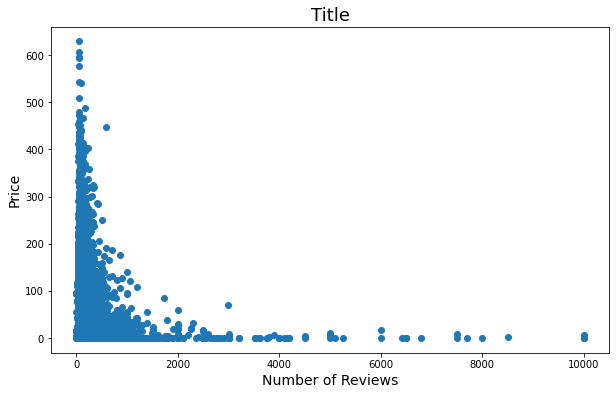

In [11]:
#This code graphs the number of reviews based on the price of the Airbnb.

fig, ax = plt.subplots(figsize=(10,6)) #Starts the graph making process and sets its size
ax.scatter(airbnb_ny_df['Price'], airbnb_ny_df['Number of Reviews']) #Gets the data from the data set
plt.title('Title', fontsize=18) #Makes the title
plt.ylabel('Price', fontsize=14) #Makes the label for the X-axis (price)
plt.xlabel('Number of Reviews', fontsize=14) #Makes the label for the Y-axis (number of reviews)
plt.show() #Draws the graph

**TO DO:** Double click to edit the code above to add an appropriate title, x-axis label, and y-axis label.

**TO DO:** Double click to edit this text. Give a range of price values that would likely provide a large number of reviews for the Airbnb.

The price range **0 - 400** can provide a large number of reviews for the Airbnb.

**TO DO:** Double click to edit this text. Give your final recommendation for price and neighborhood location to maximize the number of reviews.

I would recommend the price of the Airbnb be between **0 -100** and the neighborhoood location preference be **Brooklyn** to maximize the number of reviews.



<h2>Unstructured Data</h2>

Unstructured data is data can be harder to analyze than structured data because it doesn't have a consistent form or pattern. However, we can still get meaningful information from looking at unstructured data.

For our purposes, we're going to use the names of the Airbnb listings in the data set to determine what words we might want to include or try to avoid in our own listing.

**TO DO:** Run the two pieces of code below. The first counts the number of times the word 'quiet' comes up in the Airbnb names, the second counts the number of times the word 'dark' comes up.

In [15]:
# Count the number of times the word QUIET comes up in the Airbnb names.
airbnb_ny_df['Name'].str.count('quiet').sum()


370

In [16]:
# Count the number of times the word DARK comes up in the Airbnb names.
airbnb_ny_df['Name'].str.count('dark').sum()

0

From the data, you can see that a decent number of listings, 370, used the word quiet while 0 used the word dark. From this information we might conclude that we shouldn't use the word dark in our listing, but we might want to use the word quiet because it's fairly popular.

**TO DO:** Double click to edit the code pieces below to run counts on three words or phrases of your choice. Try to find a few different words which you'll want to include in your listing name.

In [17]:
# Edit the code below to run a count on a words or phrases of your choice.
airbnb_ny_df['Name'].str.count('peaceful').sum()

40

In [19]:
# Edit the code below to run a count on a words or phrases of your choice.
airbnb_ny_df['Name'].str.count('spacious').sum()

582

In [20]:
# Edit the code below to run a count on a words or phrases of your choice.
airbnb_ny_df['Name'].str.count('airy').sum()

52

**TO DO:** Double click to edit this text. Based on what you found when looking at the word frequencies, provide a recommendation for the name of the Airbnb.

Airy Oasis - Spacious and Peaceful Retreat